# 機器學習之分群演算法

## KMeans

In [1]:
"""
KMeans — 找到K群和最適合的圓心
迭代 — Try & Error

1. 隨機選K圓心
2. 按照距離分K群
3. 調整K圓心
4. 調整K群

Quit:K圓心不變或變動很小

每一個K → 親疏程度
合理：夠親密/夠疏遠
親密度： a = 西格瑪西格瑪(Pi - 所在群其他點j)平方
疏遠點： b = 西格瑪西格瑪(Pi - 最近群其他點j)平方
score = a * 1/b → 越小越好
silhouette_score = 1 - a/b → 0 不好
                           → 1 好

"""

'\nKMeans — 找到K群和最適合的圓心\n迭代 — Try & Error\n\n1. 隨機選K圓心\n2. 按照距離分K群\n3. 調整K圓心\n4. 調整K群\n\nQuit:K圓心不變或變動很小\n\n每一個K → 親疏程度\n合理：夠親密/夠疏遠\n親密度： a = 西格瑪西格瑪(Pi - 所在群其他點j)平方\n疏遠點： b = 西格瑪西格瑪(Pi - 最近群其他點j)平方\nscore = a * 1/b → 越小越好\nsilhouette_score = 1 - a/b → 0 不好\n                           → 1 好\n\n'

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"],
                 columns=iris["feature_names"])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris["data"])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
df["labels"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
cluster.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [6]:
from sklearn.metrics import silhouette_score
ks, scores =[], []
for k in range(2, 6):
    cluster_test = KMeans(n_clusters=k)
    cluster_test.fit(iris["data"])
    s = silhouette_score(iris["data"], 
                         cluster_test.labels_)
    ks.append(k)
    scores.append(round(s, 3))
print(ks)
print(scores)

[2, 3, 4, 5]
[0.681, 0.553, 0.498, 0.489]


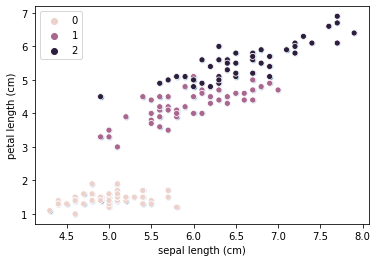

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
xs, ys = df["sepal length (cm)"], df["petal length (cm)"]
sns.scatterplot(xs, ys)
sns.scatterplot(xs, ys, iris["target"])
# sns.scatterplot(xs, ys, hue=cluster.labels_)